# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'> 컬러와 스타일 사용자 정의
> 맷플롯립에서 컬러를 정의하는 방법
- 삼중(triplet) : 빨강, 파랑, 초록 성분은 [0, 1] 간격 안에 있어야 한다.
- 사중(quadruplet) : 삼중처럼 작동하며, 네번째 성분은 투명값을 정의한다.
- 사전 정의 이름 : b(파랑), g(초록), r(빨강), c(청록,Cyan), m(자몽,Magenta), y(노랑), k(검정), w(하양)

### <font color='blue'> 자신만의 컬러 정의

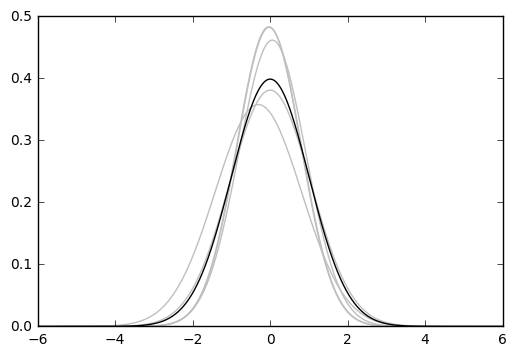

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(X, mu, sigma):
    a =  1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)

X = np.linspace(-6, 6, 1000)

for i in range(5):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X, pdf(X, mu, sigma), color='.75')
    
plt.plot(X, pdf(X, 0., 1.), color='k')
plt.show()

### <font color='blue'> 분산형 플롯용 사용자 정의 컬러 사용

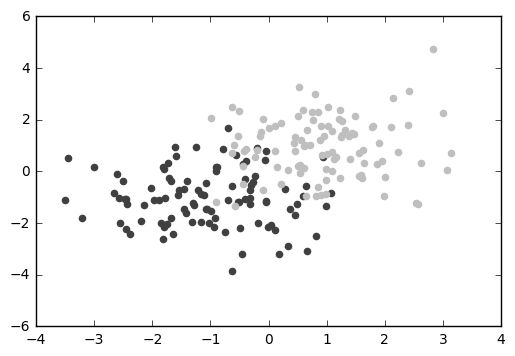

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A  = np.random.standard_normal((100, 2))
A += np.array((-1, -1))     # 분포 중심은 <-1, -1>

B  = np.random.standard_normal((100, 2))
B += np.array((1, 1))       # 분포 중심은 <1, 1>

plt.scatter(A[:,0], A[:,1], color='.25')
plt.scatter(B[:,0], B[:,1], color='.75')
plt.show()

### http://archive.ics.uci.edu/ml/datasets/Iris 에서 피셔의 붓꽃 데이터 집합인 텍스트 파일로부터 배열을 불러온다.

In [3]:
%ls
%more iris.txt

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3CBD-1374

 C:\Users\user\Documents\Anaconda_Src\데이터시각화 디렉터리

2016-11-04  오후 03:05    <DIR>          .
2016-11-04  오후 03:05    <DIR>          ..
2016-11-03  오후 11:43    <DIR>          .ipynb_checkpoints
2016-11-04  오전 12:58           455,535 DVP01_matplotlib기본.ipynb
2016-11-04  오후 03:05           692,680 DVP02_컬러와스타일.ipynb
2016-11-04  오전 12:05             4,551 iris.txt
2016-11-04  오전 12:57                34 my_data.txt
2016-11-04  오전 12:57                52 my_data2.txt
2016-11-03  오후 10:37                32 test.txt
               6개 파일           1,152,884 바이트
               3개 디렉터리  35,307,683,840 바이트 남음


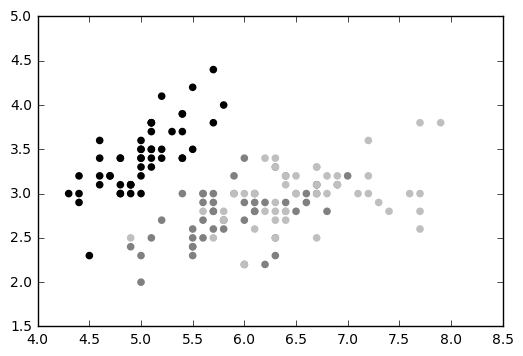

In [4]:
import numpy as np
import matplotlib.pyplot as plt

label_set = (
    b'Iris-setosa',
    b'Iris-versicolor',
    b'Iris-virginica',
)

def read_label(label):
    return label_set.index(label)

data = np.loadtxt('iris.txt',
                 delimiter = ',',
                 converters = {4: read_label})

color_set = ('.00', '.50', '.75')
color_list = [color_set[int(label)] for label in data[:,4]]

plt.scatter(data[:,0], data[:,1], color=color_list)
plt.show()

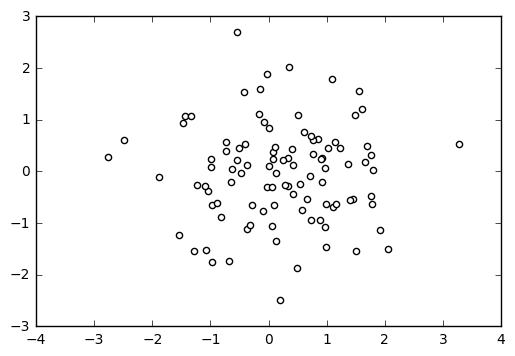

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.standard_normal((100, 2))

plt.scatter(data[:,0], data[:,1], color='1.0', edgecolors='0.0')
plt.show()

### <font color='blue'> 막대 차트용 사용자 정의 컬러 사용

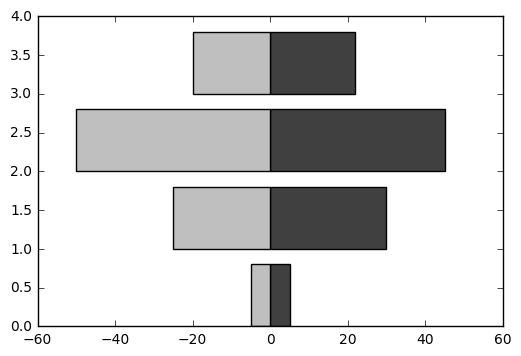

In [6]:
# 여성은 어두운 회색, 남성은 밝은 회색
import numpy as np
import matplotlib.pyplot as plt

women_pop = np.array([5., 30., 45., 22.])
men_pop   = np.array([5., 25., 50., 20.])

X = np.arange(4)
plt.barh(X, women_pop, color='.25')
plt.barh(X, -men_pop, color='.75')

plt.show()

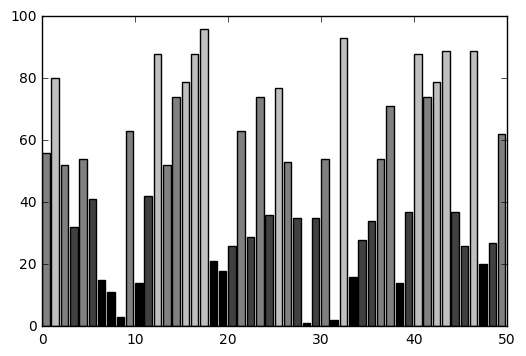

In [7]:
# 여러 수량을 비교
import numpy as np
import matplotlib.pyplot as plt

#values = np.random.random_integers(99, size=50)
values = np.random.randint(99, size=50)

color_set = ('.00', '.25', '.50', '.75')
color_list = [color_set[(len(color_set) * val) // 100] for val in values]

plt.bar(np.arange(len(values)), values, color=color_list)
plt.show()


### <font color='blue'> 원형 차트용 사용자 정의 컬러 사용

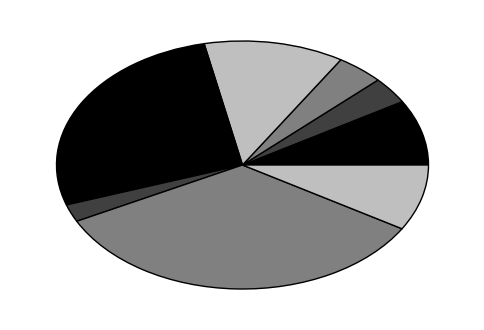

In [8]:
import numpy as np
import matplotlib.pyplot as plt

values = np.random.rand(8)
color_set = ('.00', '.25', '.50', '.75')

plt.pie(values, colors=color_set)
plt.show()

### <font color='blue'> 상자그림용 사용자 정의 컬러 사용

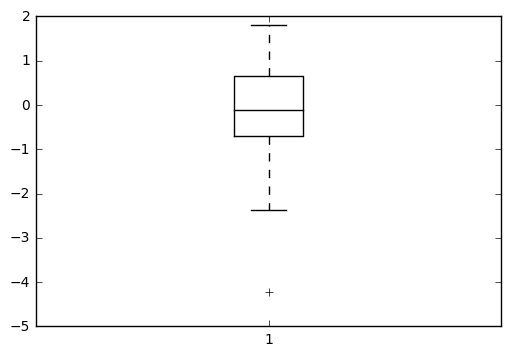

In [9]:
# 정규분포에서 얻은 100개의 무작위 값에 대한 상자그림
import numpy as np
import matplotlib.pyplot as plt

values = np.random.randn(100)

b = plt.boxplot(values)
#for name, line_list in b.iteritems():
for name, line_list in b.items():
    for line in line_list:
        line.set_color('k')
        
plt.show()

### <font color='blue'> 분산형 플롯형 컬러맵 사용

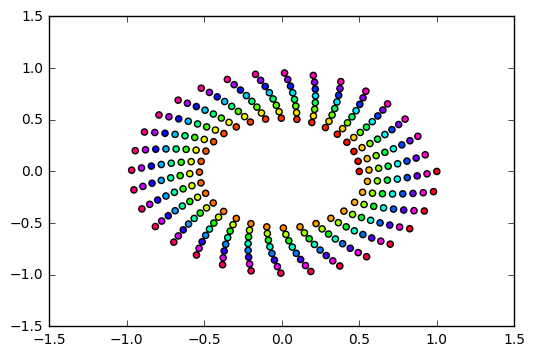

In [10]:
# matplotlib.cm 모듈에서 컬러맵을 정의
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 256
angle  = np.linspace(0, 8*2*np.pi, N)
radius = np.linspace(.5, 1., N)

X = radius * np.cos(angle)
Y = radius * np.sin(angle)

# hsv 맵은 컬러의 전체 분광을 포함하며, 멋진 무지게 테마를 만든다.
plt.scatter(X, Y, c=angle, cmap=cm.hsv)
plt.show()

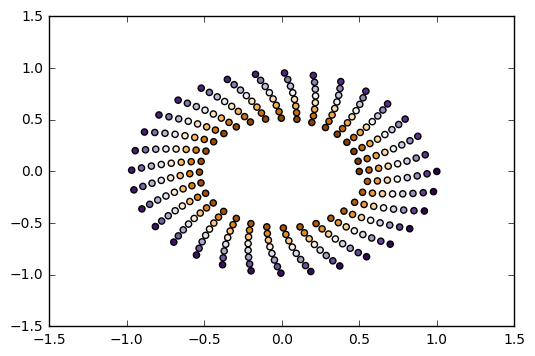

In [11]:
# matplotlib.cm 모듈에서 컬러맵을 정의
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

N = 256
angle  = np.linspace(0, 8*2*np.pi, N)
radius = np.linspace(.5, 1., N)

X = radius * np.cos(angle)
Y = radius * np.sin(angle)

# 과학시각화 경우, PuOr 맵처럼 다른 컬러맵이 더 적합하며 인식 컬러 강도를 고려한다.
plt.scatter(X, Y, c=angle, cmap=cm.PuOr)
plt.show()

### <font color='blue'> 막대 차트용 컬러맵 사용

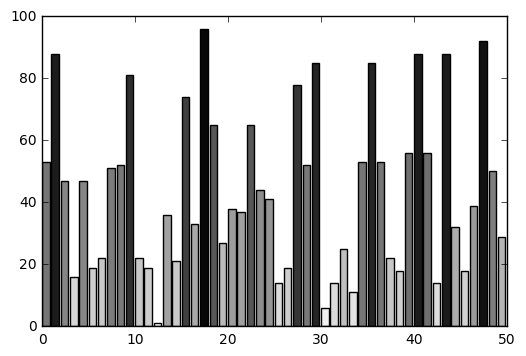

In [12]:
# matplotlib.colors : 컬러와 관계된 유틸리티 함수를 포함
# 막대의 컬러가 막대의 높이에 의존하는 막대차트
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.pyplot as plt

#values = np.random.random_integers(99, size=50)
values = np.random.randint(99, size=50)

cmap = cm.ScalarMappable(col.Normalize(0, 99), cm.binary)

plt.bar(np.arange(len(values)), values, color=cmap.to_rgba(values))
plt.show()

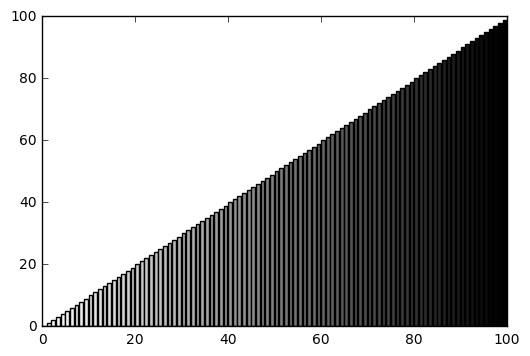

In [13]:
# matplotlib.colors : 컬러와 관계된 유틸리티 함수를 포함
# [0,99]에서 matplotlib.cm.binary 컬러맵의 컬러로 사상하기 위해 cmap 컬러맵을 먼저 생성
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.pyplot as plt

values = np.arange(100)

cmap = cm.ScalarMappable(col.Normalize(0, 99), cm.binary)

plt.bar(np.arange(len(values)), values, color=cmap.to_rgba(values))
plt.show()

### <font color='blue'> 선 패턴과 굵기 제어

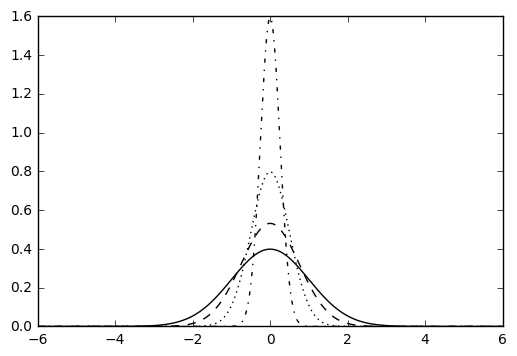

In [14]:
# 흑백문서용 그림을 생성할 때 그레이 레벨을 제한한다. 
# 선패턴과 굵기 제어하는 방법
import numpy as np
import matplotlib.pyplot as plt

def pdf(X, mu, sigma):
    a =  1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma**2)
    return a * np.exp(b * (X - mu)**2)

X = np.linspace(-6, 6, 1024)

plt.plot(X, pdf(X, 0., 1.0), color='k', linestyle='solid')     # 실선 solid
plt.plot(X, pdf(X, 0., .75), color='k', linestyle='dashed')    # 파선 dashed
plt.plot(X, pdf(X, 0., .50), color='k', linestyle='dotted')    # 점선 dotted
plt.plot(X, pdf(X, 0., .25), color='k', linestyle='dashdot')   # 쇄선 dashdot

plt.show()

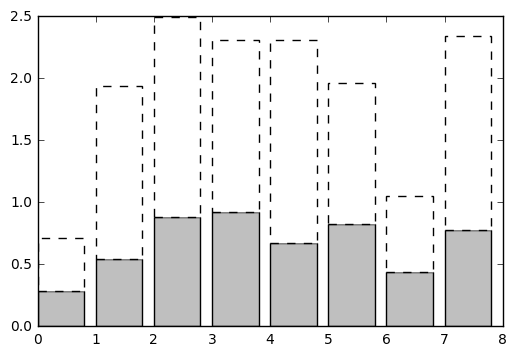

In [15]:
# 다른 플롯 타입의 선 스타일
# 선 랜더링을 수반하는 모든 명령어에서 linestyle 파라미터를 활용
import numpy as np
import matplotlib.pyplot as plt

N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)

plt.bar(X, A, color='.75')
plt.bar(X, A+B, bottom=A, color='w', linestyle='dashed')

plt.show()

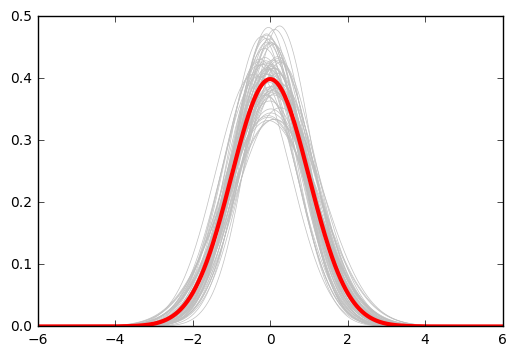

In [16]:
# linewidth는 선 폭, 즉 선의 굵기를 변경, 기본으로 굵기를 1단위로 설정
# 그래프에서 추정한 64개의 가우시안 확률밀도함수(PDF, Probability Density Functions)는 50개 표본으로 추정하며,
# 얇은 그레이 곡선으로 보여준다.
# 표본을 그릴때 사용하는 가우시안 분포를 두꺼운 검은 곡선으로 보여준다.
import numpy as np
import matplotlib.pyplot as plt

def pdf(X, mu, sigma):
    a =  1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma**2)
    return a * np.exp(b * (X - mu)**2)

X = np.linspace(-6, 6, 1024)
for i in range(64):
    samples = np.random.standard_normal(50)
    mu, sigma = np.mean(samples), np.std(samples)
    plt.plot(X, pdf(X, mu, sigma), color='.75', linewidth=.5)
    
plt.plot(X, pdf(X, 0., 1.), color='r', linewidth=3.)
plt.show()

### <font color='blue'> 채움 패턴 제어

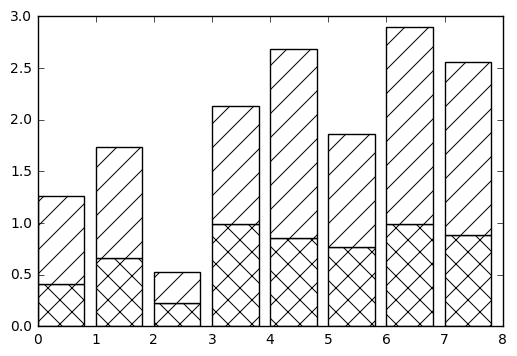

In [17]:
# 표면을 채울수 있는 방법
import numpy as np
import matplotlib.pyplot as plt

N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)

# 해칭패턴 : /, \, |, -, +, x, o, O, ., *
plt.bar(X, A, color='w', hatch='x')
plt.bar(X, A+B, bottom=A, color='w', hatch='/')
plt.show()

### <font color='blue'> 표식 스타일 제어

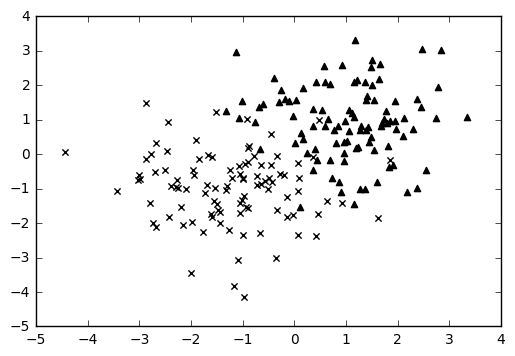

In [18]:
# 각 두 다른 컬러로 두 점 집합을 보여주는 스크립트
import numpy as np
import matplotlib.pyplot as plt

A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))

B = np.random.standard_normal((100, 2))
B += np.array((1, 1))

plt.scatter(A[:,0], A[:,1], color='k', marker='x')
plt.scatter(B[:,0], B[:,1], color='k', marker='^')
plt.show()

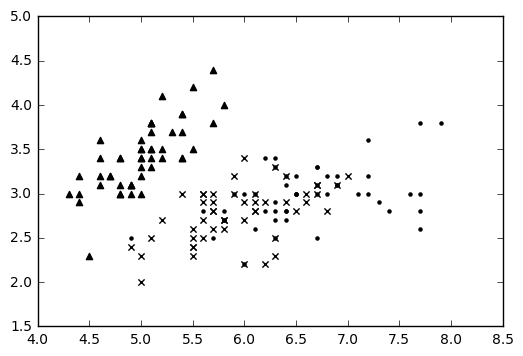

In [19]:
# color 파라미터와 달리, marker 파라미터는 입력인 표신 명세의 리스트를 받지 않는다.
import numpy as np
import matplotlib.pyplot as plt

label_list = (
    b'Iris-setosa',
    b'Iris-versicolor',
    b'Iris-virginica',
)

def read_label(label):
    return label_list.index(label)

data = np.loadtxt('iris.txt',
                  delimiter = ',',
                  converters = {4 : read_label})

marker_set = ('^', 'x', '.')
for i, marker in enumerate(marker_set):
    data_subset = np.asarray([x for x in data if x[4]==i])
    plt.scatter(data_subset[:,0], data_subset[:,1],
                color='k',
                marker=marker)
    
plt.show()

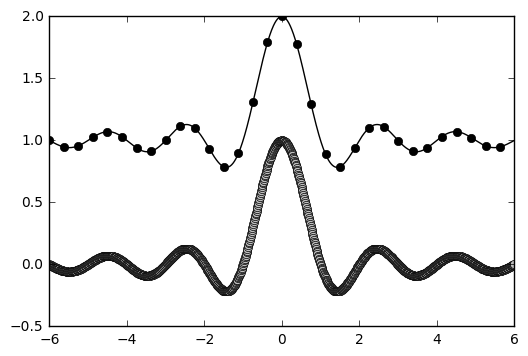

In [20]:
# markevery 파라미터는 모든 N점에 대해 한 표식만 표시한다
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1024)
Y1 = np.sinc(X)
Y2 = np.sinc(X) + 1

plt.plot(X, Y1, marker='o', color='.75')
plt.plot(X, Y2, marker='o', color='k', markevery=32)
plt.show()

### <font color='blue'> 표식 크기 제어

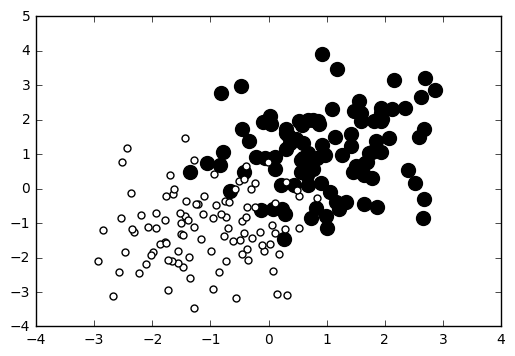

In [21]:
# 표식 크기를 제어해 동일한 선에 따르게 작업
import numpy as np
import matplotlib.pyplot as plt

A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))
B = np.random.standard_normal((100, 2))
B += np.array((1, 1))

plt.scatter(B[:,0], B[:,1], c='k', s=100.)
plt.scatter(A[:,0], A[:,1], c='w', s=25.)
plt.show()

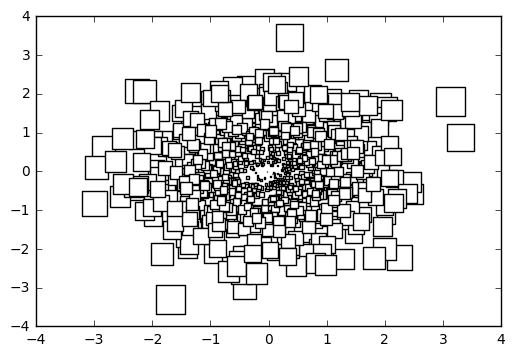

In [22]:
# 각 점의 크기인 s 파라미터로 입력인 리스트를 취할수도 있다.
import numpy as np
import matplotlib.pyplot as plt

M = np.random.standard_normal((1000, 2))
R = np.sum(M**2, axis=1)

plt.scatter(M[:,0], M[:,1], c='w', marker='s', s=32.*R)
plt.show()

### <font color='blue'> 자신만의 표식 생성

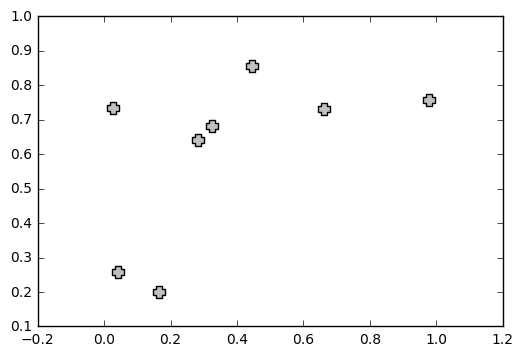

In [23]:
# 맷플롯립은 점을 함께 연결한 시퀀스인 경로를 모양으로 기술
import numpy as np
import matplotlib.path as mpath
from matplotlib import pyplot as plt

'''
    # 커서의 움직임으로 모양을 기술한다.
    • MOVETO : 커서를 지정 좌표로 이동, 선을 그리지 않는다.
    • LINETO : 커서를 지정 좌표로 선을 그리면서 이동
    • CLOSEPOLY : 아무 일도 하지 않은채 경로를 닫는다. 이 명령어로 경로가 끝난다.
'''
shape_description = [
    ( 1.,  2., mpath.Path.MOVETO), 
    ( 1.,  1., mpath.Path.LINETO), 
    ( 2.,  1., mpath.Path.LINETO), 
    ( 2., -1., mpath.Path.LINETO), 
    ( 1., -1., mpath.Path.LINETO), 
    ( 1., -2., mpath.Path.LINETO), 
    (-1., -2., mpath.Path.LINETO), 
    (-1., -1., mpath.Path.LINETO), 
    (-2., -1., mpath.Path.LINETO), 
    (-2.,  1., mpath.Path.LINETO), 
    (-1.,  1., mpath.Path.LINETO), 
    (-1.,  2., mpath.Path.LINETO), 
    ( 0.,  0., mpath.Path.CLOSEPOLY), 
]

u, v, codes = zip(*shape_description)
my_marker = mpath.Path(np.asarray((u, v)).T, codes)
data = np.random.rand(8, 8)

plt.scatter(data[:,0], data[:,1], c='.75', marker=my_marker, s=64)
plt.show()

### <font color='blue'> 표식에 관한 더 많은 제어

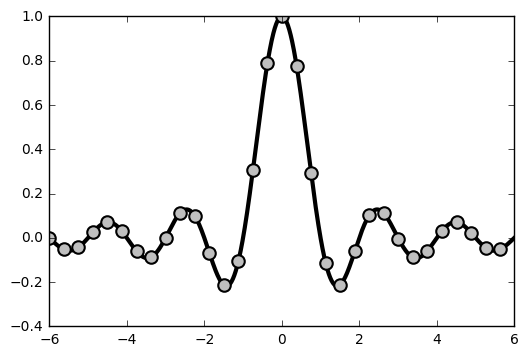

In [24]:
# 가장자리 컬러, 내부 컬러 등 같은 메세 조정은 표식에 가능하다.
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

plt.plot(X, Y, 
         linewidth = 3.,
         color = 'k',
         markersize = 9,
         markeredgewidth = 1.5,
         markerfacecolor = '.75',
         markeredgecolor = 'k',
         marker = 'o',
         markevery = 32

)

plt.show()

### <font color='blue'> 자신만의 컬러 구성표 생성

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


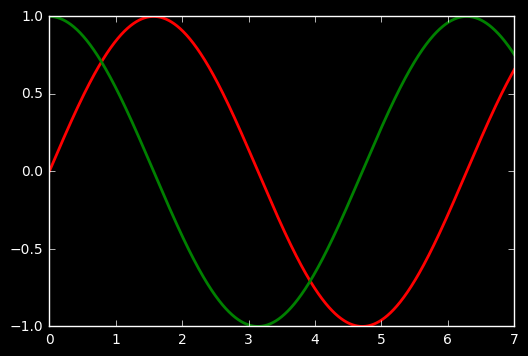

In [25]:
# 맷플롯립에서 축, 그림, 레이블 같은 다양한 객체를 개별로 기록할 수 있다.
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rc('lines', linewidth=2.)
mpl.rc('axes', facecolor='k', edgecolor='w')
mpl.rc('xtick', color='w')
mpl.rc('ytick', color='w')
mpl.rc('text',  color='w')
mpl.rc('figure', facecolor='k', edgecolor='w')
#mpl.rc('axes', color_cycle=('w', '.5', '.75'))
mpl.rc('axes', color_cycle=('r', 'g', 'b'))

X = np.linspace(0, 7, 1024)

plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))
plt.show()

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>